# Final Report - Group 35

## Introduction

The National Basketball Association (NBA) is a professional basketball league with 30 teams from the United States and Canada. Every year, each team plays 82 games in the regular season followed by a best of 7 series in each round of the playoffs with the hopes of claiming the championship trophy.

During the game, only five players from each team are allowed on the court and they are the Point Guard, Shooting Guard, Small Forward, Power Forward, and Center. Point guards run the offense as they are the team's best passers and dribblers, whereas Shooting Guards are usually the team's most proficient shooters. However, Point Guards and Shooting Guards, collectively referred to as "guards", are typically smaller in size when compared to the other positions and typically positioned outside the three point line on offense. As a result, Point Guards and Shooting Guards score the majority of three-pointers, followed by Small Forwards, Power Forwards, and Centers. In recent years, point guards have caught up to shooting guards in scoring three-pointers, which raises the question of where to position a good shooter.

We will analyze the NBA player stats for the 2017-18 season, which contains information about a player's position, three-pointers made, games played, etc. for 490 unique players in the NBA, to try and determine whether there is a difference in the number of three-point shots made per game by all Point Guards and Shooting Guards that in the NBA.

Players, coaches, and staff of an NBA team get paid based on their performances and winning the championship trophy often leads to hefty bonuses given for all of them. Therefore, we believe this question is critical as it could assist coaches in deciding where to play their finest three-point shooter. Furthermore, it could be vital information for organizations to understand when they are searching for Point Guards and Shooting Guards during free agency or in the upcoming NBA drafts. By constructing the basketball team based on their current Point Guard and Shooting Guard's three point abilities or structuring the players position based on how efficient they shoot three pointers, teams could gain a competitve advantage against each other which could ultimately assist them in claiming the prestiguous title.

As such, our population of interest is comprised of all current and future point guards and shooting guards in the NBA within the next 10 years. The data from this season is a random cluster sample, and is likely to be representative of the population.

## Methods and Results
### Overview
1. **Reading, Wrangling and Cleaning:** Loading the dataset from the web, removing irrelevant variables, filtering out non-guard positions and standardizing variable of interest.
2. **Exploratory Data Analysis:** Computing summary statistics of variable of interest across the chosen categories, and visualizing the sample distribution.

3. **Hypothesis Test:** Conducting a theory-based hypothesis test based on chosen variable of interest and categories.

4. **Comparison with Confidence Interval:** Comparing the results of the hypothesis test with a 95% confidence interval for difference in means through bootstrapping.  
    
5. **Results and Analysis:** Analyzing and summarizing the results.
### Loading Libraries

In [1]:
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(broom)
library(digest)
library(testthat)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




### Reading, Cleaning and Wrangling 

To begin we set the seed to 35 so all randomized processes will reproducible. Next we loaded our dataset from web and saved it to `nba_stats`.

In [2]:
# Setting the seed
set.seed(35)

# Reading in the raw data
nba_stats <- read_csv("https://raw.githubusercontent.com/Ne1sonLi/STAT-201-Project-Group-35/main/players_stats.csv")

# Display the first 6 rows of the raw data
head(nba_stats)

Rows: 490 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): Name, Birth_Place, Birthdate, Collage, Experience, Pos, Team
dbl (27): Games Played, MIN, PTS, FGM, FGA, FG%, 3PM, 3PA, 3P%, FTM, FTA, FT...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,⋯,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
AJ Price,26,324,133,51,137,37.2,15,57,26.3,⋯,29,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.79839
Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,⋯,30,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.36111
Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,⋯,20,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.14266
Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,⋯,24,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.37775
Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,⋯,29,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.23438
Al Jefferson,65,1992,1082,486,1010,48.1,2,5,40.0,⋯,30,us,"January 4, 1985",NA,10,205.0,C,CHA,130.05,30.94587


For our study, the columns of interest are:

1. Games Played
2. 3PM (three-pointers made)
3. Pos (position)

To tidy the data, we selected the rows with `PG` or `SG` in `Pos`. Then we remove obervations with `NA` values before dividing three-pointers made (`3PM`) by the number of games played (`Games Played`). We standardize the data because the number of point guards may not be the same as the number of shooting guards, and different players may have played a different number of games. Thus, simply comparing the number of three-pointers made will lead to inaccurate results.

In [3]:
# Filtering out observations that have NA
# Standardized by dividing 3 pointers made (3PM) by the games played (Games Played)
tidy_nba <- nba_stats |> 
    rename(pos = Pos) |>
    filter(pos == "PG" | pos == "SG") |>
    filter(!is.na('3PM') | !is.na('Games Played')) |>
    mutate(three_pts_standardized = `3PM`/ `Games Played`) |>
    select(pos, three_pts_standardized)

# Display first 6 rows of the tidy data
head(tidy_nba)

pos,three_pts_standardized
<chr>,<dbl>
PG,0.5769231
PG,1.4756098
SG,0.9864865
SG,0.9629630
SG,1.1190476
SG,0.5882353


### Exploratory Data Analysis

Using our tidy data, we will look at the summary statistics of `three_pts_standardized` across each guard position. For this, we will compute mean, median, standard deviation, maxmimum, minimum, and number of observations.

In [4]:
# Summarizing the data frame
nba_summary <- tidy_nba |>
    group_by(pos) |>
    summarize(median_three_pts = median(three_pts_standardized),
              mean_three_pts = mean(three_pts_standardized),
              sd_three_pts = sd(three_pts_standardized),
              max_three_pts = max(three_pts_standardized),
              min_three_pts = min(three_pts_standardized),
              n = n())

# Displaying the summary table
print("Table 1.1 : NBA Data Summary")
nba_summary

[1] "Table 1.1 : NBA Data Summary"


pos,median_three_pts,mean_three_pts,sd_three_pts,max_three_pts,min_three_pts,n
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
PG,0.7569223,0.8862508,0.6582483,3.575000,0,84
SG,0.9009952,1.0099519,0.7369353,3.103896,0,100


<!-- Here we see that the sample mean for shooting guards is greater than the sample mean for point guards. We also note that both `PG` and `SG` have a higher `mean_three_pts` than `median_three_pts` which could indicate that the distribution is right skewed. The number of observations for shooting guards is greater than the number of observations for point guards as well.
 -->
In Table 1.1, we see that shooting guards have higher values than point guards for all the summary statistics except for `max_three_pts`. This indicates that on average shooting guards score more three-pointers than point guards. However, this is only a sample and given the variation of `three_pts_standardized` for each of the positions, we cannot yet conclude that this difference is statistically significant. We also note that both `PG` and `SG` have a higher `mean_three_pts` than `median_three_pts` which could indicate that the distribution is right skewed. Finally, since Point Guards have a slight greater `max_three_pts` (3.575) than Shooting Guards (3.104), the range of sample values is wider for Point Guards.

We now examine the distribution of three-pointers for point guards and shootings separately with a histograms.

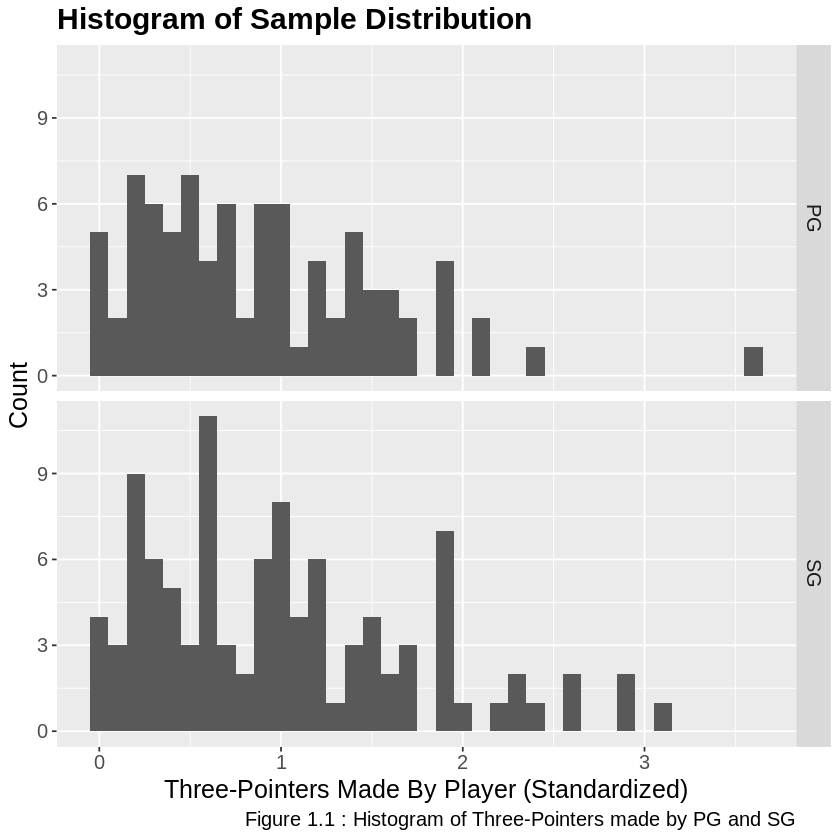

In [10]:
# Plotting the sample distribution using a histogram
options(repr.plot.width = 7, repr.plot.height = 7)

three_point_dist <- tidy_nba |> 
    ggplot(aes(x = three_pts_standardized)) + 
    geom_histogram(binwidth = .1) + 
    xlab("Three-Pointers Made By Player (Standardized)") +
    ylab("Count") +
    labs(caption = "Figure 1.1 : Histogram of Three-Pointers made by PG and SG") +
    facet_grid(rows = vars(pos)) + 
    ggtitle("Histogram of Sample Distribution") +
    theme(text = element_text(size = 15),
          plot.title = element_text(face = "bold"))

three_point_dist

In Figure 1.1, we notice that the sample distributions of `three_pts_standardized` for both the guard positions follow a similar pattern. They are both right skewed as suspected earlier and have possible outliers. 

We will now analyze the distribution of `three_pts_standardized` with boxplots across point guards and shooting guards.

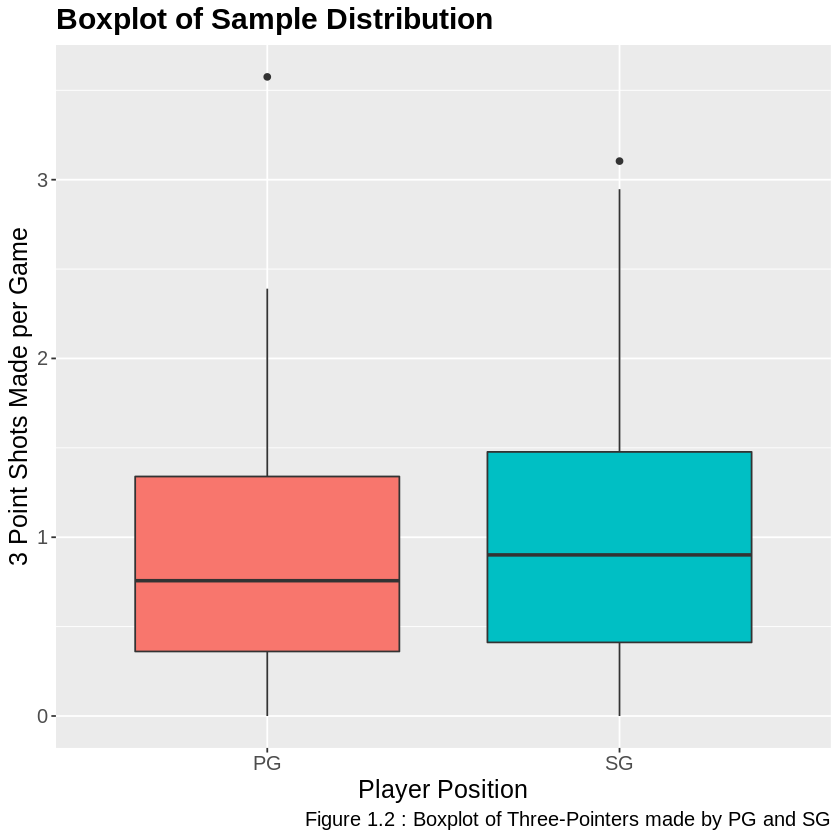

In [11]:
# Plotting the sample distribution using a boxplot
options(repr.plot.width = 7, repr.plot.height = 7)

three_point_boxplot <- tidy_nba |> 
    ggplot(aes(x = pos, y = three_pts_standardized, fill = pos)) +
    geom_boxplot() + 
    ggtitle("Boxplot of Sample Distribution") +
    xlab("Player Position") +
    ylab("3 Point Shots Made per Game") +
    labs(caption = "Figure 1.2 : Boxplot of Three-Pointers made by PG and SG") +
    guides(fill = "none") +
    theme(text = element_text(size = 15),
          plot.title = element_text(face = "bold"))

three_point_boxplot

Based on the boxplots in Figure 1.2, both positions have an outlier, as suspected previously, and follow a similar skewed pattern. The interquartile range for `SG` is slightly greater than that of `PG` which indicates that shooting guards who score three-pointers are more spread out.

### Hypothesis Test
Due to sampling variability, simply concluding that Shooting Guards make more 3 pointers than Point Guards from this sample is not appropriate and is very unconvincing. Thus, we will perform a hypothesis test at the 5% significance level to determine whether the observed difference in `three_pts_standardized` between point guards and shooting guards is statistically significant.

As shown in Figure 1.1, our sample data does not follow a Normal distribution and is right skewed. So we need to check the following assumptions and see if the Central Limit Theorem applies to our observations:

1. The sample is drawn in a random fashion — this holds true because the data from this season is a random cluster sample, and is likely to be representative of the population.

2. The observations are independent of each other — this holds true because the population (all of the current and future NBA guards within the next 10 years) is significantly greater than the sample size of 184. Thus the sample size is no greater than 10% of the population size.

3. The sample size must be large enough — this holds true as well because the sample size for point guards is 84 and the sample size for shooting guards is 100 (Table 1.1). Since both the samples are greater than 30, our sample sizes are sufficiently large enough.

Since all the assumptions of the Central Limit Theorem hold, we can assume that the distribution of sample means follow a Normal distribution. Thus, mean is an appropriate choice in summary statistic. Since we are working with quantitative variables between two independent groups, we will use a difference in means $\mu_1 - \mu_2$ as our population parameter where $\mu_1$ is mean `three_pts_standardized` of point guards and $\mu_2$ is mean `three_pts_standardized` of shooting guards.

We will be testing the following null hypothesis $H_0$ and alternative hypothesis $H_A$:
- **Null Hypothesis:** There is no difference in the mean `three_pts_standardized` between point guards and shooting guards.<br>
    $H_0:\mu_1 - \mu_2 = 0$
- **Alternative Hypothesis:** The mean `three_pts_standardized` of shooting guards is greater than that of point guards. <br>
    $H_A:\mu_1 - \mu_2 < 0$

Since we are comparing the means of two independent samples (point guards and shooting guards), we will perform a **two-sample t-test**. Let $n_1$ be the sample size of point guards with mean standardized three-pointers $x$ and let $n_2$ be the sample size of shooting guards with mean standardized three-pointers $y$. 

In [7]:
# Mean standardized three-pointers of point guards
x <- nba_summary |>
    filter(pos == "PG") |>
    pull(mean_three_pts)

# Sample size of point guards
n_1 <- nba_summary |>
    filter(pos == "PG") |>
    pull(n)

# Mean standardized three-pointers of shooting guards
y <- nba_summary |>
    filter(pos == "SG") |>
    pull(mean_three_pts)

# Sample size of shooting guards
n_2 <- nba_summary |>
    filter(pos == "SG") |>
    pull(n)

We compute the following test statistic:
$$
T = \frac{x-y}{\sqrt{\frac{s_x^2}{n_1}+\frac{s_y^2}{n_2}}}
$$
where $s_x^2$ is the sample variance of point guards and $s_y^2$ is the sample variance of shooting guards. We will compute the respective sample variances using our dataset.

In [8]:
# Variance of standardized three-pointers of point guards
s_x <- tidy_nba |>
    filter(pos == "PG") |>
    summarize(var_three_pts = var(three_pts_standardized)) |>
    pull(var_three_pts)

# Variance of standardized three-pointers of shooting guards
s_y <- tidy_nba |>
    filter(pos == "SG") |>
    summarize(var_three_pts = var(three_pts_standardized)) |>
    pull(var_three_pts)

# Calculating the test statistic
test_stat = (x - y) / sqrt((s_x / n_1) + (s_y / n_2))

Assuming our null hypothesis is true, we will construct a null model which is a **$t$-distribution** to understand how our test statistic varies due to sampling variation under the null hypothesis. Thus, the test statistic $T$ follows a $t$-distribution with degrees of freedom:
$$
df = n_1 + n_2 - 2
$$

In [22]:
# Calculating degrees of freedom
df <- abs(n_1 + n_2 - 2)

print("Table 2.1 : Degrees of Freedom")
tibble(df)

[1] "Table 2.1 : Degrees of Freedom"


df
<dbl>
182


Using the test statistic and degrees of freedom calculated above, we will determine the probability of obtaining a difference in means as extreme or more extreme than the observed difference means under the null model. This is going to be the **$p$-value**.

In [23]:
# Calculating the p-value
p_value <- pt(abs(test_stat), df, lower.tail = FALSE)

print("Table 2.2 : p-value")
tibble(p_value)

[1] "Table 2.2 : p-value"


p_value
<dbl>
0.1154399


We see that the p-value $\approx$ 0.115 is significantly greater than the significance level 0.05. We will build our $t$-distribution and visualize it using the `infer` workflow.

Warning message:
“Check to make sure the conditions have been met for the theoretical method. {infer} currently does not check these for you.”


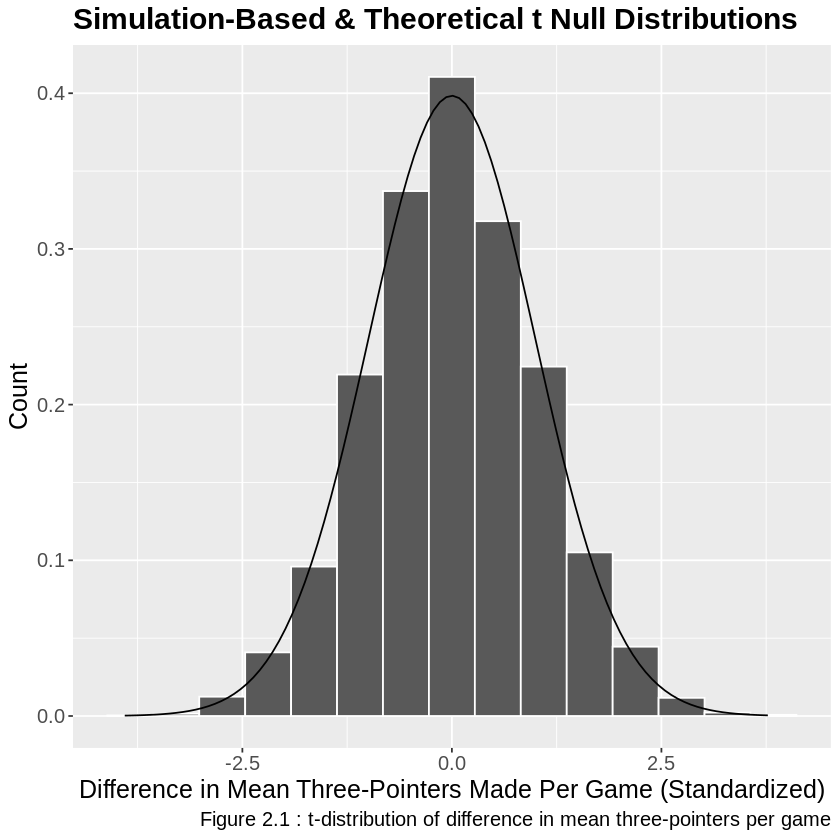

In [24]:
# Generating the t-distribution
t_dist <- tidy_nba |>
    specify(formula = three_pts_standardized ~ pos) |>
    hypothesize(null = "independence") |>
    generate(reps = 5000, type = "permute") |>
    calculate(stat = "t", c("PG", "SG"))

# Plotting the null model
null_model <- visualize(t_dist, method = "both") +
    ggtitle("Simulation-Based & Theoretical t Null Distributions") +
    ylab("Count") +
    xlab("Difference in Mean Three-Pointers Made Per Game (Standardized)") +
    labs(caption = "Figure 2.1 : t-distribution of difference in mean three-pointers per game") +
    theme(text = element_text(size = 15),
          plot.title = element_text(face = "bold"))

null_model

In Figure 2.1, we see that the null distribution of our two-sample $t$-statistic follows a $t$-distribution with 182 degrees of freedom which can be seen with the overlay of this $t$-distribution on top of our null distribution. 

We will now shade our null distribution with the $p$-value we from Table 2.2 to visualize the probability of obtaining a difference in means as extreme or more extreme than the observed difference means under the null model.

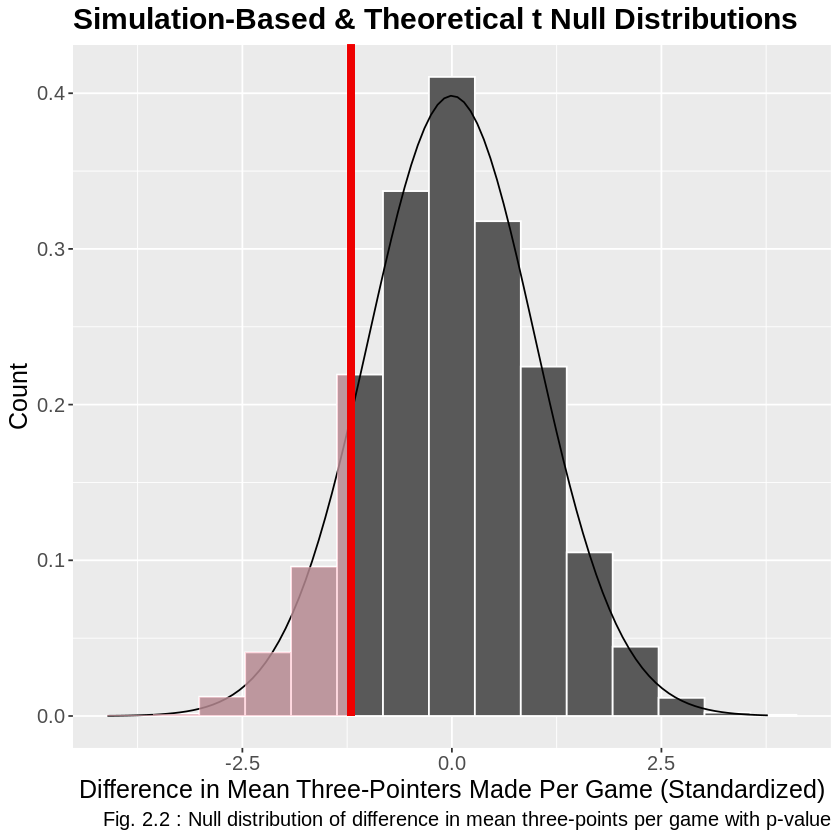

In [26]:
# Observed difference in median of standardized three-pointers
obs_two_sample_t <- tidy_nba |>
    specify(formula = three_pts_standardized ~ pos) |>
    calculate(stat = "t", c("PG", "SG"))

# Visualizing the p-value on the t-distribution
p_value_model <- null_model +
    shade_p_value(obs_stat = obs_two_sample_t, direction = "left") +
    labs(caption = "Fig. 2.2 : Null distribution of difference in mean three-points per game with p-value") +
    theme(text = element_text(size = 15),
          plot.title = element_text(face = "bold"))

p_value_model

Figure 2.2, shows we would often observe no difference in means of standardized three-pointers made if the null hypothesis were true.

Since the $p$-value is significantly greater than the significance level, we fail to reject the null hypothesis. Thus, the observed difference in standardized three-pointers made between point guards and shooting guards is statistically insignificant and there is insufficient evidence to conclude that shooting guards score more three-pointers than point guards.

### Comparison with Confidence Interval

We will construct a 1 - $\alpha$ = 95% confidence interval using a bootstrap approach and determine whether the difference in means of 0 ($\mu_1-\mu_2=0$) falls within that interval. This is another method of performing the same hypothesis test above at the 5% significance level. 

We start by generating and visualizing a bootstrap distribution of sample difference in means with 5000 reps using the `infer` workflow.

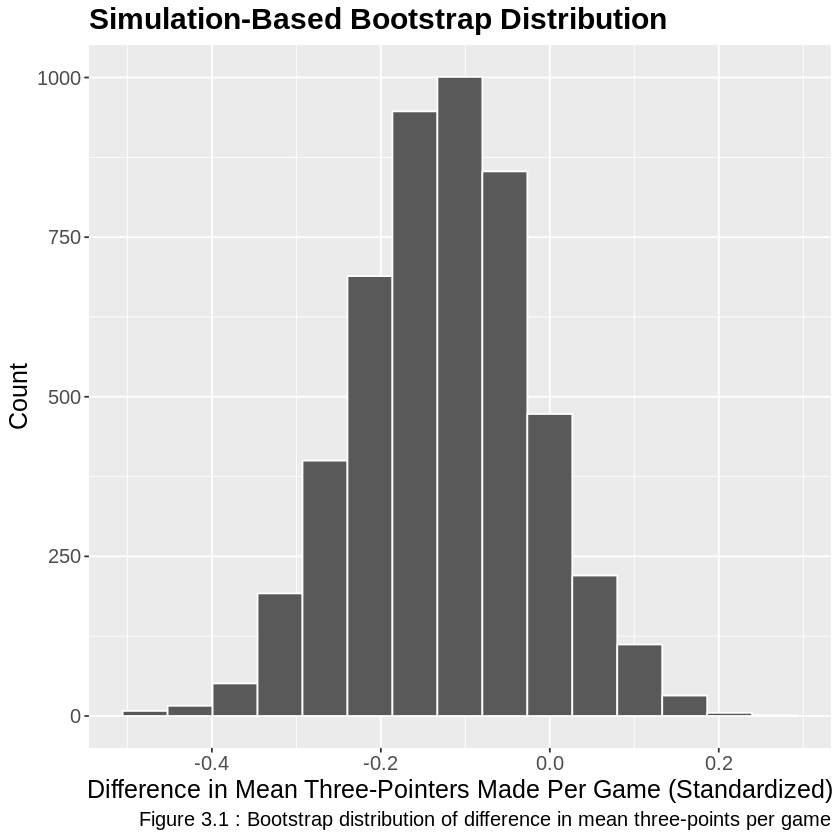

In [28]:
# Generating the bootstrap distribution
diff_in_means_bootstrap <- tidy_nba |> 
    specify(formula = three_pts_standardized ~ pos) |> 
    generate(reps = 5000, type = "bootstrap") |> 
    calculate(stat = "diff in means", order = c("PG", "SG"))

# Plotting bootstrap distribution
bootstrap_dist <- visualize(diff_in_means_bootstrap) +
    ylab("Count") +
    xlab("Difference in Mean Three-Pointers Made Per Game (Standardized)") +
    labs(caption = "Figure 3.1 : Bootstrap distribution of difference in mean three-points per game") +
    theme(text = element_text(size = 15),
          plot.title = element_text(face = "bold"))

bootstrap_dist

To construct a 95% confidence interval, we use the percentile method and shade the region of the boostrap distribution with the calculated confidence interval with the `infer` workflow.

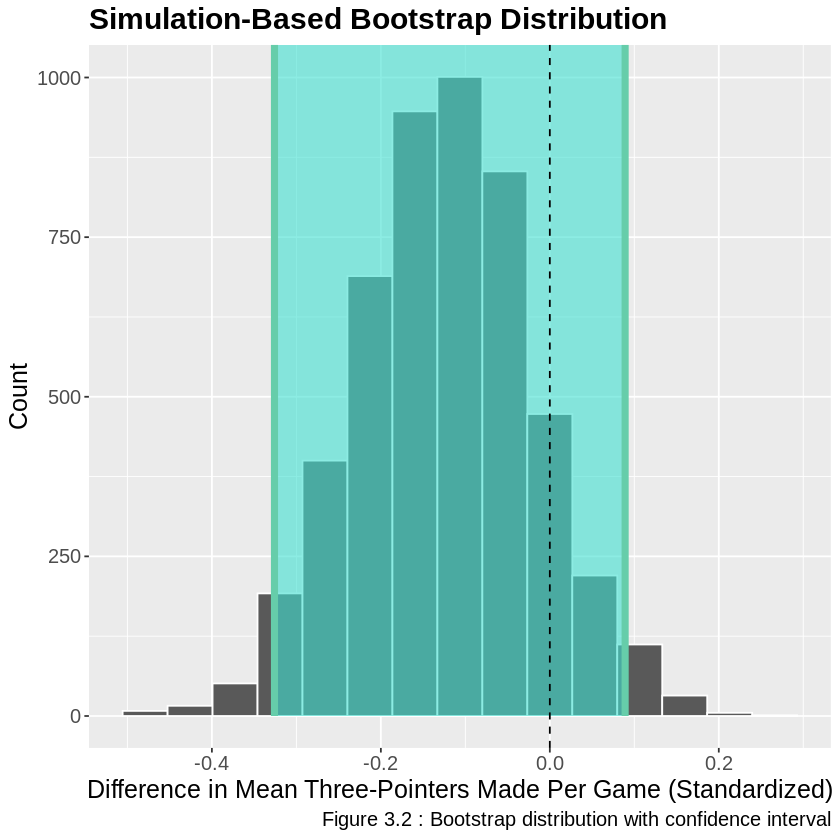

In [32]:
# Getting the 95% percentile confidence interval
diff_in_means_ci <- diff_in_means_bootstrap |> 
    get_ci(level = 0.95, type = "percentile")

# Visualizing the confidence interval and observed test statistic
diff_in_means_ci_plot <- diff_in_means_bootstrap |> 
    visualize() +
    shade_ci(endpoints = diff_in_means_ci) + 
    geom_vline(xintercept = 0, linetype = "dashed") +
    ylab("Count") +
    xlab("Difference in Mean Three-Pointers Made Per Game (Standardized)") +
    labs(caption = "Figure 3.2 : Bootstrap distribution with confidence interval") +
    theme(text = element_text(size = 15),
          plot.title = element_text(face = "bold"))

diff_in_means_ci_plot

We are 95% confident that the true difference in means of `three_pts_standardized` between point guards and shooting guards falls within the shaded area of the bootstrap distribution, which is the 95% confidence interval for the population parameter. In Figure 3.2, the difference in means of 0 (dotted line) lies within this confidence interval so it is plausible that there is no difference in means of `three_pts_standardized`. Thus, we fail to reject the null hypothesis. This conclusion coincides with the result we obtained in our two-sample $t$-test.

### Results and Analysis
According to the hypothesis test and the confidence interval of the bootstrap distribution, there is unlikely to be any difference between point guards and shooting guards when it comes to standardized three-pointers. With the two-sample $t$-test, we calculated the probability of obtaining a value just as or more extreme than the observed mean difference whereas with bootstrapping, we could visualize and see if the difference of means of 0 falls within our confidence interval. Even though both approaches are supposed to deliver the same results, bootstrapping does not rely on assumptions about underlying population distributions. On the other hand, a two-sample $t$-test requires either the population to be normally distributed or relies on the Central Limit Theorem which requires further assumptions about the population. Furthermore, bootstrapping is easier to understand due to its simulation-based nature and visualization of the results. 

In the case of the difference in standardized three-pointers made between point guards and shooting guards, both approaches yield the same results and, thus, we can say our conclusion is reasonable. However, we risk committing a Type II error if there truly is a difference in standardized three-pointers made.

## Discussion 

As shown above, both our $p$-value of 11.26% and a difference of 0 falling within our 95% confidence interval for the difference in medians both suggest that there is no significant difference in the number of 3-point shots made by point guards and shooting guards in the 2017-28 NBA season, which suggests that both groups are rougly equally proficent in shooting three-pointers. This result is what we expected to find, with the rise in three-point shots made by point guards, we predicted it would be difficult for shooting gaurds to outclass them in today's game.  The results of this study could result in coaches re-evaluating the types of players they place in each position. With two high scoring positions, it could now be an option for coaches to sacrifice the defensive capabilites for shooting capabilites in some players to help them win more games. A subsequent study could test whether teams with a higher scoring point guard, win more games than teams with a higher scoring shooting guard.

## References
1. Analysis of the final actions used in basketball during formative years ... (n.d.). Retrieved March 16, 2023, from https://www.researchgate.net/publication/255994752_Analysis_of_the_final_actions_used_in_basketball_during_formative_years_according_to_player's_position 

2. Camli, M. B. (2018, November 4). NBA Player stats 2017-2018. Kaggle. Retrieved March 16, 2023, from https://www.kaggle.com/datasets/mcamli/nba17-18 

3. Examining positional difference in basketball players’ field goal ... (n.d.). Retrieved March 16, 2023, from https://journals.sagepub.com/doi/abs/10.1177/17479541221096772 